# 2.3.1 サンプルデータセット

forgeデータセット

In [25]:
%matplotlib inline
from preamble import *

In [26]:
# データセットの生成
X, y = mglearn.datasets.make_forge()

X.shape: (26, 2)


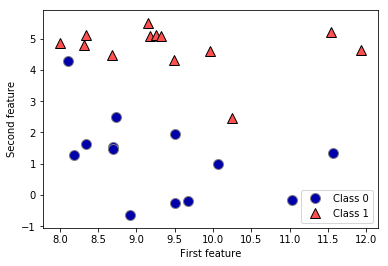

In [27]:
# データセットをプロット
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
print("X.shape: {}".format(X.shape))

waveデータセット

In [28]:
X, y = mglearn.datasets.make_wave(n_samples=40)

Text(0,0.5,'Target')

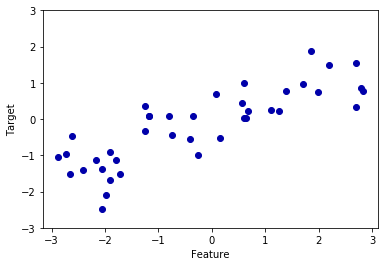

In [29]:
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Target")

ウィスコンシン乳がんデータセット（クラス分類用）

In [30]:
from sklearn.datasets import load_breast_cancer

In [31]:
cancer = load_breast_cancer()
print("cancer.keys():\n{}".format(cancer.keys()))

cancer.keys():
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


このデータセットは、30の特徴量を持つ569のデータポイントで構成されている

In [32]:
print("Shape of cancer data: {}".format(cancer.data.shape))

Shape of cancer data: (569, 30)


569のデータポイントのうち、212が悪性で357が良性である。

In [33]:
print("Sample count per class:\n{}".format(
    {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))

Sample count per class:
{'malignant': 212, 'benign': 357}


個々の特徴量の意味を示す記述は、feature_names属性に格納されている。

In [34]:
print("Feature names:\n{}".format(cancer.feature_names))

Feature names:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


boston_housingデータセット（回帰用）

In [35]:
from sklearn.datasets import load_boston

このデータセットには、13の特徴量を持つ506のデータポイントが含まれる。

In [36]:
boston = load_boston()
print("Data shape: {}".format(boston.data.shape))

Data shape: (506, 13)


ここでは、このデータセットを拡張し、13の測定結果だけを特徴量とするのではなく、特徴量間の積（交互作用(interaction）と呼ぶ）も見ることにする。
つまり、犯罪率と高速航路への利便性を特徴量として見るだけでなく、それらの積も特徴量として考えるのだ。
この導出されたデータセットは、load_extended_boston関数でロードすることができる

In [37]:
X, y = mglearn.datasets.load_extended_boston()

In [38]:
print("X.shape:{}".format(X.shape))

X.shape:(506, 104)


104の特徴量とは、もとの13の特徴量に、13の特徴量から2つの特徴量を選ぶ重複ありの組み合わせ91を足したものである。
これから、これらのデータセットを用いて、さまざまな機械学習アルゴリズムの特徴を説明していく。
まずはアルゴリズムそのものを見てみよう。
最初は、前章でも見た、k-最近傍法(k-NN)を再度見ていく。

# 2.3.2 k-最近傍法

## 2.3.2.1 k-最近傍法によるクラス分類

k-最近傍法(k-NN)アルゴリズムは、1つの近傍点、つまり訓練データに含まれる点の中で予測したいデータポイントに最も近いものだけを見る。この点に対する出力をそのまま用いる。

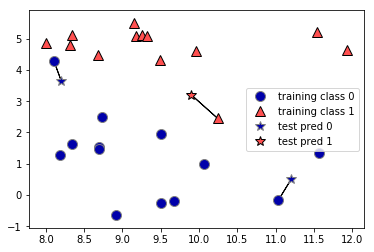

In [39]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

1-最近傍モデルによるforgeデータセットに対する予測

　ここでは、星印で示される3つの新しいデータポイントを加えている。
それぞれに対して訓練データのうちで最も近いものに印を付けた。
1-最近傍法アルゴリズムの予測では、近傍点のラベルが予測されたラベルになる（星印の色で表されている）。
　近傍点は1つとは限らず、任意個の、つまりk個の近傍点を考慮することもできる。これが、k-最近傍法の名前の由来だ。1つ以上の近傍点を考慮に入れる場合には、**投票**でラベルを決める。つまり、個々のテストする点に対して、近傍点のうち、いくつがクラス0に属し、いくつがクラス1に属するのかを数えるのだ。そして、最も多く表れたクラスをその点に与える。言い換えればk-最近傍点の多数派のクラスを採用するのだ。

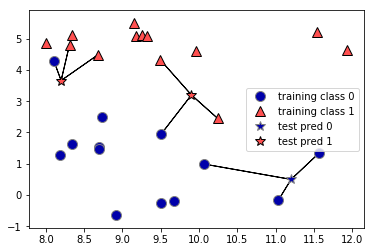

In [40]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

左上の新しいデータポイントに対する予測は、1つの最近傍点だけを使った場合と異なっている。
ここで示しているのは2クラス分類問題だが、この方法は任意のクラス数に対しても適用できる。
クラスがたくさんあるときには、それぞれのクラスに対して近傍点がいくつあるかを数えて、最も多いクラスを予測値とすればよい。

scikit-learnを用いてk-最近傍法アルゴリズムが適用できるかを見てみよう。
まずデータを訓練セットとテストセットに分割し、汎化性能を評価できるようにする。

In [41]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

次に、クラスをインポートして、インスタンスを生成する。この際に、近傍点の数などのパラメータを渡すことができる。ここでは3にしている。

In [43]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

次に、訓練セットを用いてクラス分類器を訓練する。KNeighborsClassifierの場合には、データセットを保存するだけだ。保存したデータセットを用いて、予測の際に近傍点を計算する。

In [44]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

テストデータに対して予測を行うにはpredictメソッドを呼び出す。テストセットのそれぞれのデータポイントに対して、訓練セットの中から最近傍点を計算し、最も多いクラスを見つけ出す。

In [45]:
print("Test set predictions: {}".format(clf.predict(X_test)))

Test set predictions: [1 0 1 0 1 0 0]


モデルの汎化性能を評価するためには、scoreメソッドをテストデータとテストラベルで呼び出せばよい。

In [46]:
print("Test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))

Test set accuracy: 0.86


およそ86%の制度であった。つまりこのモデルはテストデータセットのサンプルのうち86%に対して正しくクラスを予測したということだ。

## 2.3.2.2 KNeighborsClassifierの解析

　2次元のデータセットについては、xy平面のすべての点について、予測結果を表示することができる。平面を、そこに点があったとしたら分類されていたであろうクラスに従って色付けする。こうすると、アルゴリズムがクラス0に割り当てる場合と、クラス1に割り当てる場合の決定境界(decision boundary)が見える。次のコードはkが1、3、9の場合の決定境界を描画する

1
AxesSubplot(0.125,0.125;0.227941x0.755)
3
AxesSubplot(0.398529,0.125;0.227941x0.755)
9
AxesSubplot(0.672059,0.125;0.227941x0.755)


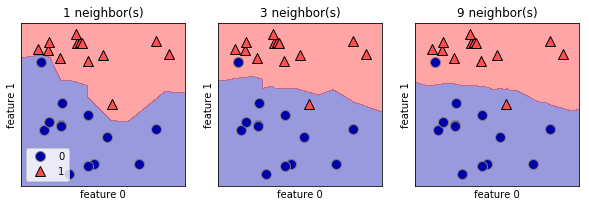

In [47]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    # fitメソッドは自分自身を返すので、1行で
    # インスタンスを生成してfitすることができる。
    print(n_neighbors)
    print(ax)
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)

　図からわかるように、1つの最近傍点のみを用いると、決定境界は、訓練データに近くなる。より多くの最近傍点を考慮すると、決定境界はよりなめらかになる。なめらかな境界は、単純なモデルに対応する。つまり、最近傍点が少ない場合は複雑度の高いモデルに対応し（過学習ぎみ）、最近傍点が多い場合は複雑度の低いモデルに対応する。極端なケースとして、近傍点数を訓練データセットのすべてのデータポイントの数にしてみよう。すべてのテストデータポイントは、全く同じ近傍点（つまりすべての訓練データポイント）を持つことになるので、すべての予測結果は同じ、すなわち訓練セット中で最も多いクラスになる。
 　ここで議論したモデルの複雑さと汎化性能の関係が確認できるか調べてみよう。これには実世界のcancerデータセットを用いる。まずデータセットを訓練セットとテストセットに分割し、訓練セットに対する性能とテストセットに対する性能を近傍点の数に対して評価する。

In [48]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66)

In [49]:
training_accuracy = []
test_accuracy = []
# n_neighborsを1から10まで試す
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # モデルを構築
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # 訓練セット精度を記録
    training_accuracy.append(clf.score(X_train, y_train))
    # 汎化精度を記録
    test_accuracy.append(clf.score(X_test, y_test))

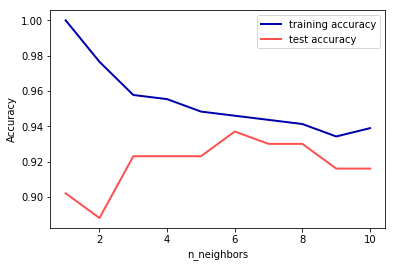

In [50]:
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

　このグラフでは、y軸に訓練セットおよびテストセットに対する精度を、x軸に考慮する最近傍点の数をプロットしている。実世界のデータなので、なかなかなめらかにはならないのだが、過剰適合と適合不足の特徴は読み取れる（少ない数の最近傍点だけを考慮するほうが複雑なモデルに当たる）。1つの最近傍点のみを考慮する場合には、訓練セットに対する予測は完璧である。より多くの最近傍点を考慮すると、モデルはシンプルになり、訓練制度は低下する。一方、1つの最近傍点のみを考慮する場合のテストセットに対する制度は低い。これは、1つの最近傍点ではモデルが複雑すぎるからである。一方、10の最近傍点を考慮すると、モデルはシンプルになりすぎ、性能はさらに低下する。最良の性能はこの間のどこか、6のあたりにある。ただし、このグラフのスケールに注意しておく必要がある。最悪の場合でも88%の精度はあり、場合によってはこれでも十分だ。

## 2.3.2.3 k-近傍回帰

 k-最近傍法には、回帰を行う変種がある。ここでも1最近傍点を用いるものから見ていこう。
今回はwaveデータセットを用いる。3つのテストデータポイントを緑色の星印としてx軸上に書いた。
1最近傍点を用いる予測では、最近傍点の値をそのまま使う。次図の青い星印が予測点である。

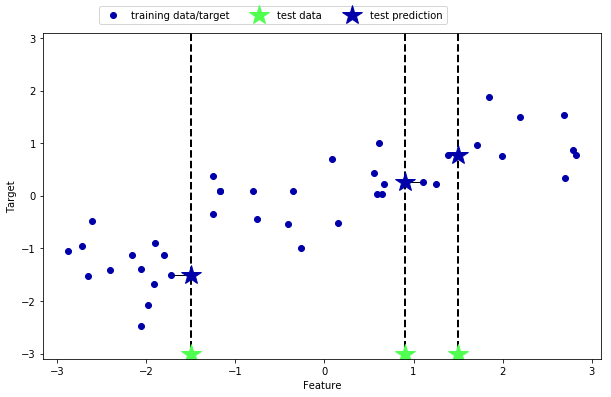

In [51]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

　クラス分類の場合と同様に、より多くの最近傍点を用いることもできる。
複数の最近傍点を用いる場合には、最近傍点の平均値を用いる。

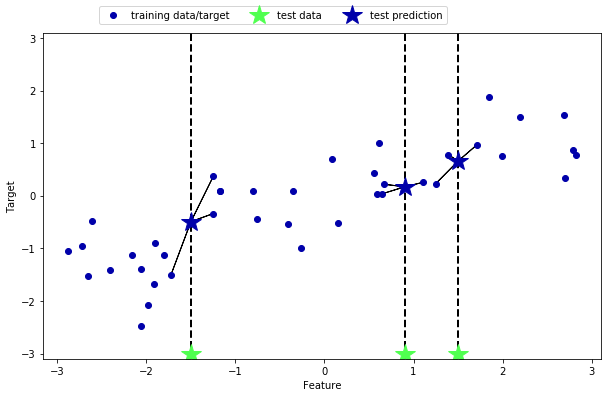

In [52]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

　回帰のためのk-最近傍アルゴリズムは、scikit-learnのKNeighborsRegressorクラスに実装されている。
KNeighborsClassifierと同様に利用できる。

In [53]:
from sklearn.neighbors import KNeighborsRegressor

In [54]:
X, y = mglearn.datasets.make_wave(n_samples=40)

In [55]:
# waveデータセットを訓練テストとテストセットに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [56]:
# 3つの最近傍点を考慮するように設定してモデルのインスタンスを生成
reg = KNeighborsRegressor(n_neighbors=3)
# 訓練データと訓練ターゲットを用いてモデルを学習させる
reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='uniform')

In [57]:
# テストセットに対して予測を行う
print("Test set predictions:\n{}".format(reg.predict(X_test)))

Test set predictions:
[-0.054  0.357  1.137 -1.894 -1.139 -1.631  0.357  0.912 -0.447 -1.139]


　scoreメソッドを用いてモデルを評価することもできる。このメソッドに対して回帰予測器は、R^2スコアを返す。
R^2スコアは決定係数(coefficient of determination)とも呼ばれ、回帰モデルの予測の正確さを測る指標で、0から1までの値をとる。
1は完全な予測に対応し、0は訓練セットのレスポンス値(y_train)の平均を返すだけのものに対応する。

In [58]:
print("Test set R^2: {:.2f}".format(reg.score(X_test, y_test)))

Test set R^2: 0.83


## 2.3.2.4 KNeighborsRegressorの解析